# DataSet - Training

In [62]:
import csv
import numpy as np


dataset = []
index = 0
fields = ['verified', 'profile_location', 'profile_name', 'profile_image', 'account_date', 'profile_desc', 'fav_count', 'retweet_count', 'tweet_location', 'text', 'media', 'rumour_label']
with open("train_data.csv",'r') as file:
    file = csv.reader(file)
    header = next(file)
    for row in file:
        dataset.append(row)

dataset = np.array(dataset)
np.random.seed()
np.random.shuffle(dataset)
print(dataset.shape)

(1093, 12)


# Authentication - Twitter Api

In [63]:
import os
import tweepy

auth = tweepy.OAuthHandler('s9iqHQMCnqbRSTYLZijznltjj', 'edpnKGn7l90SPKoFBc5eiBi2kEjb5sFe5CfH2vZ4O51g1lvfXw')
# Access Token, Access Token Secret
auth.set_access_token('914187849875914752-qyp1TmXtXp4BDUOzknUlPdF9owp582g', '7SpLBABZOAnph1j1AmA6AYodpdWdRx0IXHaWQ7muTwQKM')
api = tweepy.API(auth)

if (not api):
    print("Authentication failed :(")
else:
    print("Authentication successfull!!! :D")

Authentication successfull!!! :D


# Extracting features and labels - Training Set

In [64]:
numFeatures = dataset.shape[1]-1
numSamples = dataset.shape[0]

labels = dataset[:,-1]
featureSet = np.delete(dataset,numFeatures,1)
featureSet = np.delete(featureSet,8,1)
featureSet = np.delete(featureSet,4,1)
print(featureSet.shape)

(1093, 9)


In [65]:
ee1 = featureSet[:800]
ee2 = labels[:800]
print (ee1.shape)
print (ee2.shape)

(800, 9)
(800,)


In [66]:
fields = ['verified', 'profile_location', 'profile_name', 'profile_image', 'profile_desc', 'fav_count', 'retweet_count', 'text', 'media',]

In [67]:
print(labels.shape)

(1093,)


# Sentiment Analyzer

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(sentence,lan):
    if lan=='en':
        vs = analyzer.polarity_scores(sentence)
        return vs['compound']
    else:
        return None

In [69]:
print(get_sentiment("Bloody hell ! my friends towards #Durgapuri are all stuck in jam for hours now . Enough of cowardice @DelhiPolice","en"))

-0.7712


In [70]:
print(featureSet[0])

['False' 'Right behind you.' 'Anonymous'
 'https://pbs.twimg.com/profile_images/468596776379760640/Ls02jaUP_normal.png'
 'Supports digital and afk activism. #SaveTheInternet' '177' '703'
 'Journalists being arrested in #Ferguson. This aggression will not stand, man RT @jonswaine: Just saw two reporters in ferguson cuffed'
 'False']


# Preprocessing of Training Set

In [71]:
for sample in ee1:
    for i in range(len(fields)):
        if(fields[i]=="verified" or fields[i]=="media"):
            if(sample[i]=="True"):
                sample[i] = int(1)
            else:
                sample[i] = int(0)
        
        elif(fields[i]=="profile_location" or fields[i]=="profile_name" or fields[i]=="profile_image"):
            if(sample[i]!="" and sample[i]!=" "):
                sample[i]=int(1)
            else:
                sample[i]=int(0)
                
        elif(fields[i]=="profile_desc" or fields[i]=="text"):
            sample[i] = get_sentiment(sample[i],"en")
            
        else:
            sample[i] = int(sample[i])

In [72]:
for i in range(labels.shape[0]):
    if(labels[i]=="True"):
        labels[i]=1
    else:
        labels[i]=0

In [73]:
labels = labels.astype(np.float64)
ee1 = ee1.astype(np.float64)
ee2 = ee2.astype(np.float64)

# Multinomial Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
ee1 = np.abs(ee1)
gnb = MultinomialNB()
gnb.fit(ee1,ee2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [135]:
print("Accuracy on the training set:")
print(gnb.score(ee1,ee2))

Accuracy on the training set:
0.56125


# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier()
clf.fit(ee1,ee2)

/home/aarish/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
print("Accuracy on the Training Set:")
print(clf.score(ee1,ee2))

Accuracy on the Training Set:
0.98375


# Gaussian Naive Bayes 

In [50]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(ee1,ee2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
print("Accuracy on Training Set:")
print(clf2.score(ee1,ee2))

Accuracy on Training Set:
0.315


# DataSet , Preprocessing - Test

In [75]:
featureSet_test = []
labels_test = []
with open("final_tweets.csv","r") as file:
    file = csv.reader(file)
    header = next(file)
        
    check = 0
    count = 0
    ids = {}
    for row in file:
        row_new = [0 for i in range(9)]
        check = 0
        handle = row[1]
        user = api.get_user(screen_name=handle)
        if user.verified:
            row_new[0]=1
            
        if user.location is not None:
            row_new[1]=1
            
        if user.name is not None or user.name!="":
            row_new[2]=1
            
        if "profile_image_url_https" in user.profile_image_url_https!="":
            row_new[3]=1
            
        row_new[4] = get_sentiment(user.description,"en")
        row_new[5] = row[5]
        row_new[6] = row[4]
        row_new[7] = get_sentiment(row[6],"en")
        
            
        permalink = row[11]
        
        print(row[16])
        if(row[16]=="Rumour"):
            print("entered")
            check = 1
        
        featureSet_test.append(row_new)
        labels_test.append(check)
        cur_id = (row[11].split('/')[-1])
        print(cur_id)
        ids[cur_id] = count
        count += 1
        
featureSet_test = np.array(featureSet_test)
featureSet_test = np.asarray(featureSet_test, dtype='float64')
labels_test = np.array(labels_test)

print(len(ids))
print(featureSet_test.shape)
# np.reshape(labels_test,(featureSet_test.shape[0],1))
# prnit(featureSet_test.shape)

Help
1232794504891006976
Rumour
entered
1232766445458575360
Help
1232762350287106048
Rumour
entered
1232753880599089152
Rumour
entered
1232753460535341057
Rumour
entered
1232752283701694464
Rumour
entered
1232751505607942145
Rumour
entered
1232751342407561218
Help
1232748914232713218
Help
1232747764657860608
Not Related
1232479372373659648
Action
1231865011401904128
Chaos
1231509071553089537
Complaint
1227745985410940928
Informatory
1235186113632800770
Informatory
1235051360950685696
Action
1234458108723777539
Informatory
1233931674229952512
Informatory
1233713259946971137
Help
@DelhiPolice @ndtvindia
Help
1232905318973263872
Rumour
entered
1232754432892424192
Help
1232746702542647296
Help
1232719442892574721
Help
1232714753660858374
Help
1232712596580515840
Help
1232565685966032896
Help
1232560317613268993
Help
1232552590958874624
Rumour
entered
1232548501483085825
Help
1232546306134040576
Informatory
1232541633792507904
Help
1232540574466682880
Help
1232536821923340289
Help
123253278

# Loading the Saved Model

In [76]:
import pickle
def load():
    dbfile = open('model', 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db
model = load()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.21.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Multinomial Naive Bayes

In [77]:
import numpy as np
featureSet_test = np.asarray(featureSet_test, dtype='float64')
labels_test = np.asarray(labels_test, dtype='float64')
q = model.predict(featureSet_test)
q = np.asarray(q, dtype='float64')

# Accuracy

In [78]:
def accuracy(a,b):
    return np.sum(a==b)/(b.shape[0])

In [79]:
print("Accuracy on Test Set:")
print(accuracy(q,labels_test))
# print(model.score(featureSet_test,labels_test))

Accuracy on Test Set:
0.5794392523364486


# True Positives

In [81]:
def check(predicted):
    count = 0 
    pp = 0
    for i in range (len(predicted)) :
        if predicted[i] == labels_test[i] and predicted[i] > 0 :
            count+=1
        if labels_test[i] == 1.0:
            pp+=1
    print (count)
    print (pp)
check(q)

11
26


# Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for the model:")
print(confusion_matrix(labels_test,q))

Confusion Matrix for the model:
[[51 30]
 [15 11]]


# ROC Curve

In [83]:
from sklearn.metrics import roc_curve, auc
print(ee2.shape)
y_score = model.predict_proba(featureSet_test)
print(y_score.shape)
fpr, tpr, _ = roc_curve(labels_test,y_score[:,1])
roc_auc = auc(fpr, tpr)

(800,)
(107, 2)


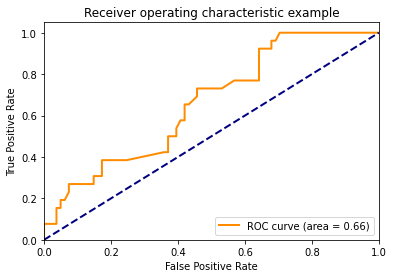

In [84]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier 

In [85]:
print("Accuracy on Test Set:")
print(clf.score(featureSet_test,labels_test))
pred2 = clf.predict(featureSet_test)
check(pred2)

Accuracy on Test Set:
0.7663551401869159
2
26


# Gaussian Naive Bayes

In [52]:
print("Accuracy on Test Set:")
print(clf2.score(featureSet_test,labels_test))
pred3 = clf2.predict(featureSet_test)
check(pred3)

Accuracy on Test Set:
0.2523364485981308
26
26


# Predictions of Multinomial Naive Bayes

In [27]:
for i in range(len(q)):
    print ('Row Number', i+2, 'Predicted',q[i],'Actual',labels_test[i])

Row Number 2 Predicted 0.0 Actual 0.0
Row Number 3 Predicted 0.0 Actual 1.0
Row Number 4 Predicted 0.0 Actual 0.0
Row Number 5 Predicted 0.0 Actual 1.0
Row Number 6 Predicted 0.0 Actual 1.0
Row Number 7 Predicted 0.0 Actual 1.0
Row Number 8 Predicted 0.0 Actual 1.0
Row Number 9 Predicted 0.0 Actual 1.0
Row Number 10 Predicted 1.0 Actual 0.0
Row Number 11 Predicted 1.0 Actual 0.0
Row Number 12 Predicted 1.0 Actual 0.0
Row Number 13 Predicted 1.0 Actual 0.0
Row Number 14 Predicted 0.0 Actual 0.0
Row Number 15 Predicted 0.0 Actual 0.0
Row Number 16 Predicted 1.0 Actual 0.0
Row Number 17 Predicted 0.0 Actual 0.0
Row Number 18 Predicted 0.0 Actual 0.0
Row Number 19 Predicted 0.0 Actual 0.0
Row Number 20 Predicted 1.0 Actual 0.0
Row Number 21 Predicted 1.0 Actual 0.0
Row Number 22 Predicted 0.0 Actual 0.0
Row Number 23 Predicted 0.0 Actual 1.0
Row Number 24 Predicted 1.0 Actual 0.0
Row Number 25 Predicted 1.0 Actual 0.0
Row Number 26 Predicted 0.0 Actual 0.0
Row Number 27 Predicted 0.0 Actua

# Rumour Spread Function

In [86]:
def rumour_spread(id):
    id = str(id)
    cur_feature = featureSet_test[ids[id]]
    print(model.predict_proba(cur_feature.reshape(1, -1)))

In [87]:
print(rumour_spread(1229271298880217090))

[[0.62763142 0.37236858]]
None
